In [4]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray 
from skimage.io import imread, imsave
from commons import plot
import numpy as np
from skimage.filters import gaussian
import open3d as o3d
from mpl_toolkits.mplot3d import Axes3D
import cv2 as cv
from skimage.transform import resize

In [2]:
# !pip install open3d 
# pip install opencv-python

^C
  Attempting uninstall: pywinpty
    Found existing installation: pywinpty 2.0.2
    Uninstalling pywinpty-2.0.2:
      Successfully uninstalled pywinpty-2.0.2


In [2]:
rgb_path = 'base/texture_resized.png'
depth_raw = o3d.io.read_image("base/349_crop.png")

color_raw_resized = resize(imread('base/texture.jpg'), 
                           np.array(depth_raw).shape,
                           anti_aliasing=False)

imsave(rgb_path, color_raw_resized)

color_raw = o3d.io.read_image(rgb_path)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [3]:
# color_raw = o3d.io.read_image("base/349_crop.png")
# depth_raw = o3d.io.read_image("base/349_crop.png")

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, 
    depth_raw,
    convert_rgb_to_intensity=True)

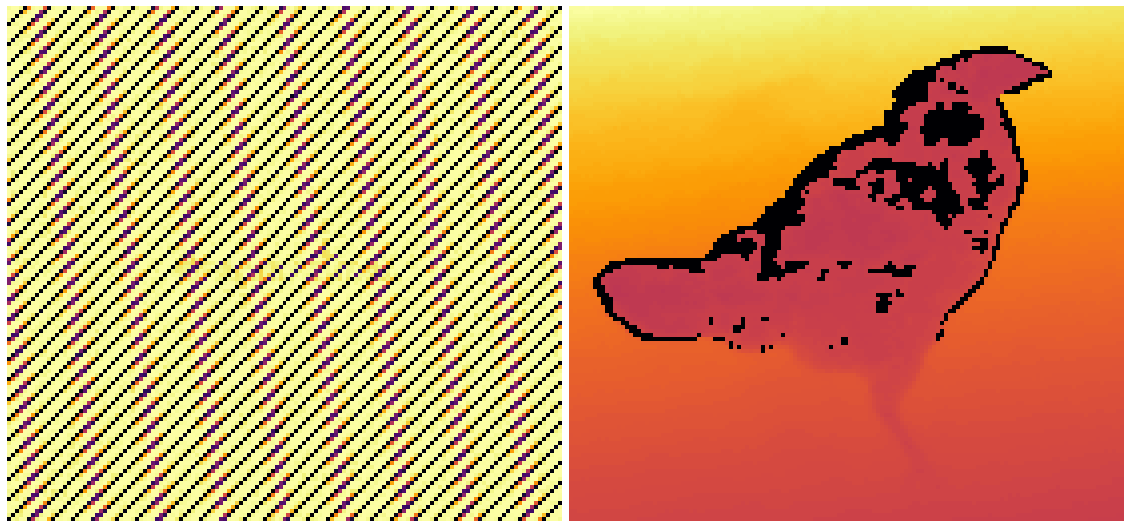

In [4]:
plot([rgbd_image.color, rgbd_image.depth], (1, 2))

In [5]:
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.Kinect2DepthCameraDefault
)

In [6]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)

In [7]:
x, y, z = np.asarray(pcd.points).reshape(3, -1)

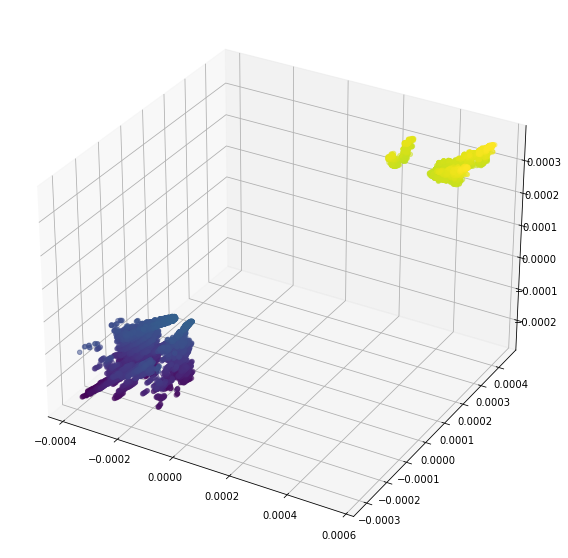

In [8]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, alpha=0.5)
plt.show()

In [9]:
pcd.paint_uniform_color([1, 0.706, 0])
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [10]:
_, inliers = pcd.segment_plane(distance_threshold=0.000009,
                               ransac_n=5,
                               num_iterations=500)

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)

In [11]:
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

In [12]:
aabb = outlier_cloud.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)

obb = outlier_cloud.get_oriented_bounding_box()
obb.color = (0, 1, 0)

o3d.visualization.draw_geometries([outlier_cloud, aabb, obb])

In [13]:
alpha = 0.01

tetra_mesh, pt_map = o3d.geometry.TetraMesh.create_from_point_cloud(outlier_cloud)
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(outlier_cloud, 
                                                                     alpha, 
                                                                     tetra_mesh,
                                                                     pt_map);
mesh.paint_uniform_color([0.4, 0.7, 0.5])
mesh.compute_triangle_normals()
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud, mesh])

[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh